# E1: Análisis Exploratorio de Datos en Python con Pandas y NumPy

En esta prueba práctica, los estudiantes aplicarán sus conocimientos en Python y herramientas de análisis de datos dentro del entorno Jupyter Notebook. A partir de un dataset ficticio de pacientes, deberán demostrar su capacidad para:
- Configurar el entorno de trabajo en Anaconda y Jupyter Notebook.
- Utilizar Pandas y NumPy para la manipulación y exploración de datos.
- Aplicar operaciones estadísticas básicas para extraer información relevante.
- Generar visualizaciones de datos con Matplotlib.

Este ejercicio tiene como objetivo evaluar la habilidad del estudiante para trabajar con datos en Python, desde su carga y preprocesamiento hasta su análisis y visualización. Se espera que los participantes estructuren su código de manera clara y utilicen buenas prácticas de programación.


#### Configuración del Entorno:

- Verifica que las librerías necesarias (numpy y pandas) estén instaladas en tu entorno. Si no lo están, instálalas usando pip o conda.
- Importa las librerías necesarias (numpy, pandas, matplotlib.pyplot) y muestra sus versiones en el notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import time

print(f"Version de NumPy: {np.__version__}")
print(f"Version de Pandas: {pd.__version__}")
print(f"Version de Matplotlib: {plt.matplotlib.__version__}")

Version de NumPy: 2.0.2
Version de Pandas: 2.2.3
Version de Matplotlib: 3.9.4


#### Carga y Exploración de Datos:

- Descarga y carga el archivo datos_pacientes.csv en un DataFrame de Pandas.
- Muestra las primeras 5 filas del dataset.
- Obtén información sobre los tipos de datos y verifica la existencia de valores nulos en el dataset.


In [2]:
df = pd.read_csv("datos_pacientes.csv")
df.head()

,ID,Edad,Género,Peso,Altura,Presión_Arterial
0,1,71,F,116.4,1.69,143
1,2,34,M,67.7,1.50,127
2,3,80,M,75.1,1.69,137
3,4,40,M,76.6,1.90,116
4,5,43,M,92.4,1.80,109


In [3]:
# Obtén información sobre los tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Edad              1000 non-null   int64  
 2   Género            1000 non-null   object 
 3   Peso              1000 non-null   float64
 4   Altura            1000 non-null   float64
 5   Presión_Arterial  1000 non-null   int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 47.0+ KB


In [4]:
# verificar los valores nulos
print(df.isnull().sum())

ID                  0
Edad                0
Género              0
Peso                0
Altura              0
Presión_Arterial    0
dtype: int64


#### Análisis Estadístico con Pandas:

- Muestra un resumen estadístico de las variables numéricas.
- Calcula la edad promedio de los pacientes y el número de pacientes por género.
- Identifica cuántos pacientes tienen una presión arterial superior a 130 mmHg.

In [5]:
# Muestra un resumen estadístico de las variables numéricas
df.describe()

,ID,Edad,Peso,Altura,Presión_Arterial
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,500.500000,54.195000,84.51870,1.757730,135.25200
std,288.819436,20.521747,20.12022,0.141855,25.85767
min,1.000000,20.000000,50.00000,1.500000,90.00000
25%,250.750000,36.000000,66.50000,1.640000,112.00000
50%,500.500000,54.000000,84.75000,1.760000,136.00000
75%,750.250000,72.000000,102.05000,1.880000,157.00000
max,1000.000000,89.000000,119.80000,2.000000,179.00000


In [6]:
# Calcula la edad promedio de los pacientes
edad_promedio = df['Edad'].mean()
print(f"La edad promedio es: {edad_promedio:.1f}")

La edad promedio es: 54.2


In [7]:
numero_pacientes_genero = df['Género'].value_counts()
print(f"Número de pacientes por género: {numero_pacientes_genero}")

Número de pacientes por género: Género
M    502
F    498
Name: count, dtype: int64


In [8]:
# pacientes tienen una presión arterial superior a 130 mmHg.
pacientes_presion_alta = df[df['Presión_Arterial'] > 130]

numero_pacientes = pacientes_presion_alta.shape[0]
print(f"Número pacientes tienen una presión arterial superior a 130 mmHg:  {numero_pacientes}")

Número pacientes tienen una presión arterial superior a 130 mmHg:  555


#### Manipulación de Datos con NumPy y Pandas:

- Crea una nueva columna llamada IMC (Índice de Masa Corporal, BMI) utilizando la fórmula: 

<img src=https://www.eufic.org/en/media/images/2.2._bmi_img_1_.png width="250">

- Agrega una columna categórica Estado_IMC que clasifique a los pacientes en:
    - Bajo peso (IMC < 18.5)
    - Normal (IMC entre 18.5 y 24.9)
    - Sobrepeso (IMC entre 25 y 29.9)
    - Obesidad (IMC >= 30)
- Muestra la cantidad de pacientes en cada categoría de Estado_IMC.


In [9]:
# Crea una nueva columna llamada IMC
df['IMC'] = df['Peso']/(df['Altura'] ** 2)
df.head()

,ID,Edad,Género,Peso,Altura,Presión_Arterial,IMC
0,1,71,F,116.4,1.69,143,40.754876
1,2,34,M,67.7,1.50,127,30.088889
2,3,80,M,75.1,1.69,137,26.294598
3,4,40,M,76.6,1.90,116,21.218837
4,5,43,M,92.4,1.80,109,28.518519


In [10]:
start1 = time.time()
# clasifica el estado de IMC

def calcular_edo (imc):
    if imc < 18.5:
        return 'Bajo peso'
    elif 18.5 <= imc < 24.9:
        return 'Normal'
    elif 25 <= imc < 29.9:
        return 'Sobrepeso'
    else:
        return 'Obesidad'

df['Estado_IMC'] = df['IMC'].apply(calcular_edo)

print(f"El tiempo de ejecución: {time.time() - start1}")

El tiempo de ejecución: 0.00055694580078125


In [11]:
# Mostrar la cantida de pacientes
conteo_imc = df['Estado_IMC'].value_counts()
print(f"La cantidad de pacientes es: {conteo_imc}") 

La cantidad de pacientes es: Estado_IMC
Obesidad     395
Normal       249
Sobrepeso    219
Bajo peso    137
Name: count, dtype: int64


#### Visualización de Datos:

- Genera un gráfico de barras que muestre la cantidad de pacientes en cada categoría de Estado_IMC.
- Usa matplotlib para personalizar el gráfico con título, etiquetas y colores adecuados.


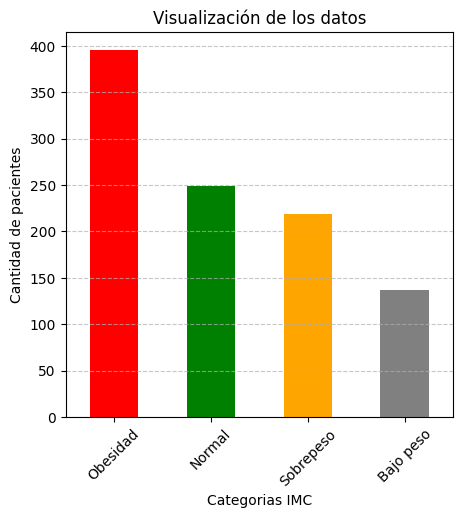

In [12]:
# Visualización de los datos
plt.figure(figsize=(5,5))
conteo_imc.plot(kind="bar", color=["red", "green", "orange", "gray" ])

plt.title("Visualización de los datos")
plt.xlabel("Categorias IMC")
plt.ylabel("Cantidad de pacientes")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [13]:
# numpy.select()
import time

start = time.time()
# definir las condiciones a clasificar
condiciones = [
    df["IMC"] < 18.5,
    (df["IMC"] >= 18.5) & (df["IMC"] <= 24.9),
    (df["IMC"] >= 25) & (df["IMC"] < 29),
    df["IMC"] >= 30
]

# definir las categorias
categorias = ["Bajo peso", "Normal", "Sobrepeso", "Obesidad"]

df['Estado_IMC'] = np.select(condiciones, categorias, default="Desconocido")

print(f"El tiempo de ejecución: {time.time() - start}")

# Mostrar el conteo
conteo_imc = df["Estado_IMC"].value_counts()
print("Cantidad de pacientes en cada categoría de IMC:")
print(conteo_imc)


El tiempo de ejecución: 0.0008461475372314453
Cantidad de pacientes en cada categoría de IMC:
Estado_IMC
Obesidad       387
Normal         249
Sobrepeso      176
Bajo peso      137
Desconocido     51
Name: count, dtype: int64
